In [1]:
# Challenge Part 1
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [11]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [12]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# Get the total number of rides for each type of city.
type_of_city_ride_count =pyber_data_df.groupby(["type"]).count()["ride_id"]
type_of_city_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
# Get the total number of drivers for each type of city.
type_of_city_driver_total = city_data_df.groupby(["type"])["driver_count"].sum()
type_of_city_driver_total

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [15]:
# Get the total fares for each type of city.
type_of_city_fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
type_of_city_fare_total

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [16]:
# Calculate the average fare per ride.
avg_fare_per_ride = pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df.groupby(["type"]).count()["ride_id"]
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [17]:
# Calculate the average fare per driver.
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"])["driver_count"].sum()
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [18]:
# Determine the city type.
per_city_types = pyber_data_df.set_index(["type"])
per_city_types

,city,date,fare,ride_id,driver_count
type,,,,,
Urban,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5
Urban,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72
Urban,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57
Urban,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34
Urban,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46
...,...,...,...,...,...
Rural,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6
Rural,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2
Rural,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1


In [19]:
# Adding a list of values with keys to create a new DataFrame.
pyber_summary_df = pd.DataFrame({
          "Total Rides": type_of_city_ride_count,
          "Total Drivers": type_of_city_driver_total,
          "Total Fares": type_of_city_fare_total,
          "Average Fare per Ride": avg_fare_per_ride,
          "Average Fare per Driver": avg_fare_per_driver})
# Remove the index name.
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [20]:
# Format the pyber summary.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

# Display the DataFrame.
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [21]:
# Challenge Part 2
# Get the index of column names from the merged data file
pyber_data_df.columns

Index(['city', 'date', 'fare', 'ride_id', 'driver_count', 'type'], dtype='object')

In [22]:
# Rename the columns in the merged DataFrame
pyber_data_df.rename(columns = {'city':'City', 'date':'Date', 'fare':'Fare', 'ride_id':'Ride Id', 'driver_count':'No Drivers', 'type':'City Type'}, inplace=True)
# List index of new column names
pyber_data_df.columns

Index(['City', 'Date', 'Fare', 'Ride Id', 'No Drivers', 'City Type'], dtype='object')

In [23]:
# Set the dataframe to the 'Date' column
pyber_data_df.set_index('Date')

,City,Fare,Ride Id,No Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [24]:
# make a new dataframe by using the copy() method from the merged data
fares_summary_df = pyber_data_df[['Date', 'Fare', 'City Type']].copy()
fares_summary_df

,Date,Fare,City Type
0,2019-01-14 10:14:22,13.83,Urban
1,2019-03-04 18:24:09,30.24,Urban
2,2019-02-24 04:29:00,33.44,Urban
3,2019-02-10 23:22:03,23.44,Urban
4,2019-03-06 04:28:35,34.58,Urban
...,...,...,...
2370,2019-04-29 17:04:39,13.38,Rural
2371,2019-01-30 00:05:47,20.76,Rural
2372,2019-02-10 21:03:50,11.11,Rural
2373,2019-05-07 19:22:15,44.94,Rural


In [25]:
# Set the index to the 'Date' column
fares_summary_df.set_index('Date')

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [26]:
# Set the index to the datetime data type
fares_summary_df['Date'] = pd.to_datetime(fares_summary_df['Date'])
fares_summary_df.set_index('Date', inplace=True)
fares_summary_df

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [27]:
# Check the DataFrame using the info() method to make sure the index is a datetime data type.
fares_summary_df.info('Date')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [28]:
# Get the total fares for each type of city.
city_total_fare_df = fares_summary_df.groupby(["City Type"]).sum()["Fare"]
city_total_fare_df

City Type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: Fare, dtype: float64

In [29]:
# Reset the index
fares_summary_df.reset_index()

,Date,Fare,City Type
0,2019-01-14 10:14:22,13.83,Urban
1,2019-03-04 18:24:09,30.24,Urban
2,2019-02-24 04:29:00,33.44,Urban
3,2019-02-10 23:22:03,23.44,Urban
4,2019-03-06 04:28:35,34.58,Urban
...,...,...,...
2370,2019-04-29 17:04:39,13.38,Rural
2371,2019-01-30 00:05:47,20.76,Rural
2372,2019-02-10 21:03:50,11.11,Rural
2373,2019-05-07 19:22:15,44.94,Rural


In [30]:
# Check the DataFrame using the info() method
fares_summary_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
Fare         2375 non-null float64
City Type    2375 non-null object
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [31]:
# Create a pivot table
pyber_pivottable_1 = pd.pivot_table(fares_summary_df, index =['Date'], columns =['City Type'], aggfunc = np.sum)
#pyber_pivottable_1 = fares_summary_df.pivot(index="Date", columns="City Type")["Fare"]
#pyber_pivottable_1 = pd.pivot_table(fares_summary_df, values ='Fare', index=['Date'], columns = ['City Type'])

In [32]:
# Create new dataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc.
by_date_df = pyber_pivottable_1.loc['2019-01-01':'2019-04-28']
by_date_df

Fare                
City Type           Rural Suburban  Urban
Date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [33]:
# Create a new DataFrame by setting the DataFrame with resample() in weekly bins, and calculate the sum() of the fares for each week.
weekly_bins_df = by_date_df['Fare'].resample('W').sum()
weekly_bins_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


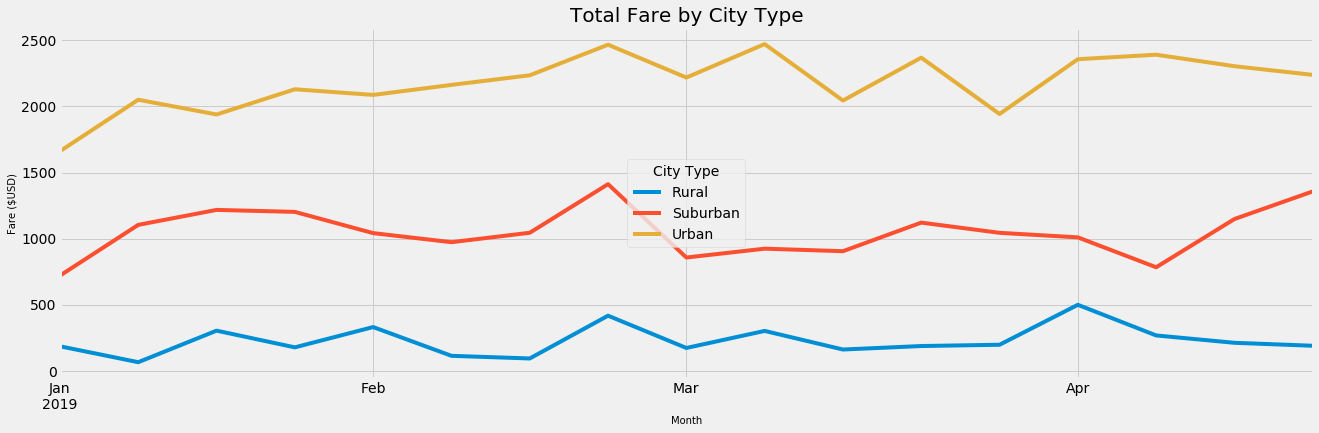

In [34]:
# Create Plot
from matplotlib.pyplot import style
style.use('fivethirtyeight')
lineplot = weekly_bins_df.plot(figsize=(20,6))
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=10)
plt.xlabel("Month", fontsize=10)

# Save the Figure
plt.savefig("analysis/challengepart2.png")